In [41]:
# Libraries used for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import numpy as np
from scipy.stats.stats import pearsonr

In [2]:
# Import dataset using Pandas
wine_data = pd.read_csv('Desktop\winemag-data_first150k.csv')



In [3]:
# Data set structure/type
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


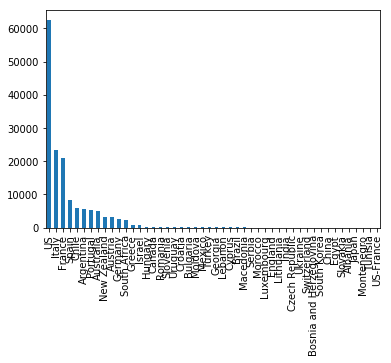

In [4]:
# Created bar chart of "country" variable since it's non numeric cannot create histogram
wine_data['country'].value_counts().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020719A434A8>]],
      dtype=object)

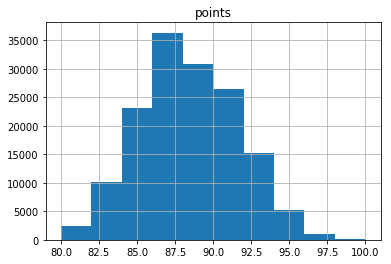

In [5]:
wine_data.hist('points')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020711F102B0>]],
      dtype=object)

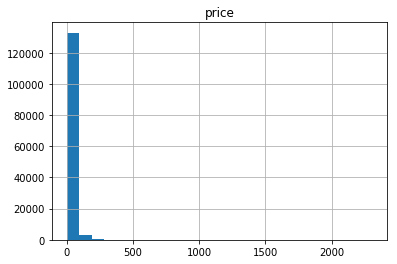

In [6]:
wine_data.hist('price',bins=25)

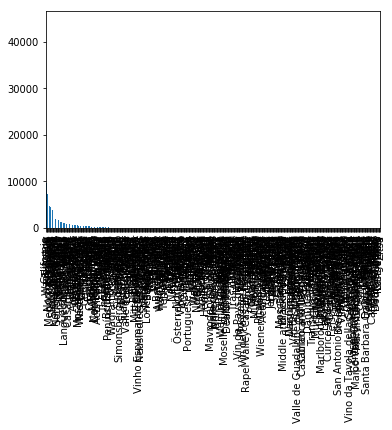

In [7]:
# Province bar chart. Too many varitions to be meaningful. Needs to be scrubbed. see value counts listed in next cell.
# Data is scrubbed in later cells below
wine_data['province'].value_counts().plot(kind='bar')

In [8]:
# Value counts listed in descending order by province
wine_data['province'].value_counts()

California                       44508
Washington                        9750
Tuscany                           7281
Bordeaux                          6111
Northern Spain                    4892
Mendoza Province                  4742
Oregon                            4589
Burgundy                          4308
Piedmont                          4093
Veneto                            3962
South Australia                   3004
Sicily & Sardinia                 2545
New York                          2428
Northeastern Italy                1982
Loire Valley                      1786
Alsace                            1680
Marlborough                       1655
Southwest France                  1601
Central Italy                     1530
Southern Italy                    1439
Champagne                         1370
Catalonia                         1352
Rhône Valley                      1318
Colchagua Valley                  1201
Languedoc-Roussillon              1082
Douro                    

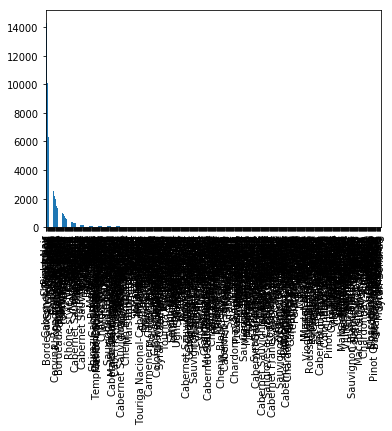

In [9]:
# Bar chart of "variety" variable. Too many variations(outliers). Scrubbed data will be in cells below.
wine_data['variety'].value_counts().plot(kind='bar')

In [10]:
wine_data['variety'].value_counts()

Chardonnay                       14482
Pinot Noir                       14291
Cabernet Sauvignon               12800
Red Blend                        10062
Bordeaux-style Red Blend          7347
Sauvignon Blanc                   6320
Syrah                             5825
Riesling                          5524
Merlot                            5070
Zinfandel                         3799
Sangiovese                        3345
Malbec                            3208
White Blend                       2824
Rosé                              2817
Tempranillo                       2556
Nebbiolo                          2241
Portuguese Red                    2216
Sparkling Blend                   2004
Shiraz                            1970
Corvina, Rondinella, Molinara     1682
Rhône-style Red Blend             1505
Pinot Gris                        1365
Barbera                           1365
Cabernet Franc                    1363
Sangiovese Grosso                 1346
Pinot Grigio             

In [11]:
scrubbed_wine = wine_data.loc[wine_data['country'].isin(['US','Italy','France','Spain','Chile','Argentina','Portugal','Australia','New Zealand','Austria'])] 

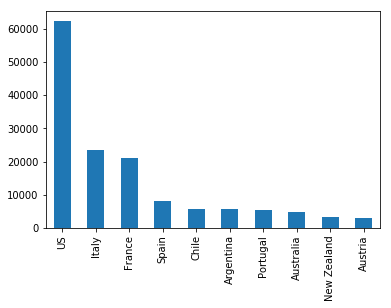

In [12]:
# Scrubbed country bar chart.
scrubbed_wine['country'].value_counts().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020714996160>]],
      dtype=object)

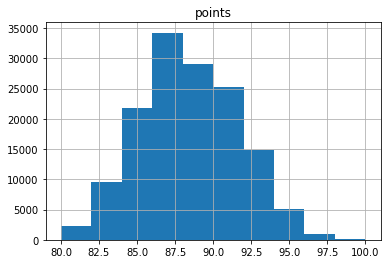

In [13]:
scrubbed_wine.hist('points')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020715254EF0>]],
      dtype=object)

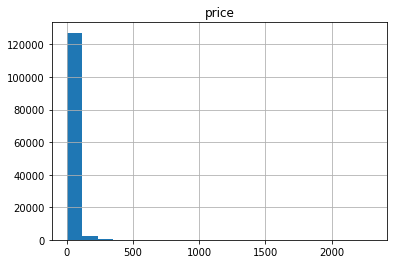

In [14]:
scrubbed_wine.hist('price',bins=20)

In [15]:
# Scrubbing process to filter on top 10 provinces within scrubbed_wine data
pro_scrub = scrubbed_wine.loc[scrubbed_wine['province'].isin(['California','Washington','Tuscany','Bordeaux','Northern Spain','Mendoza Province','Oregon','Burgundy','Piedmont','Veneto'])]

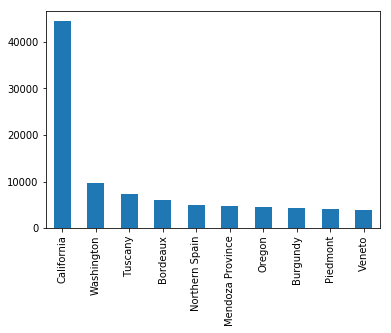

In [16]:
# Scrubbed Province data
pro_scrub['province'].value_counts().plot(kind='bar')

In [17]:
# Scrubbing process to filter on top 10 varieties within scrubbed_wine data
var_scrub = scrubbed_wine.loc[scrubbed_wine['variety'].isin(['Chardonnay','Pinot Noir','Cabernet Sauvignon','Red Blend','Bordeaux-style Red Blend','Syrah','Merlot','Sauvignon Blanc','Zinfandel','Sangiovese'])]

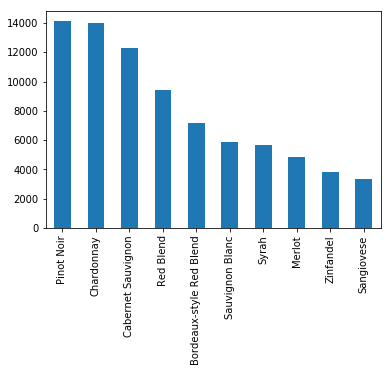

In [18]:
# Scrubbed variety data
var_scrub['variety'].value_counts().plot(kind='bar')

In [19]:
scrubbed_wine['price'].value_counts()

20.0      7393
15.0      6536
18.0      5674
25.0      5663
30.0      5212
10.0      4826
12.0      4658
13.0      4193
35.0      4032
16.0      3999
40.0      3866
14.0      3627
22.0      3511
50.0      3284
17.0      3266
24.0      3258
28.0      3204
45.0      3145
19.0      3059
11.0      2872
9.0       2165
60.0      2124
32.0      2120
55.0      1746
38.0      1718
26.0      1656
23.0      1602
8.0       1525
75.0      1485
36.0      1425
          ... 
222.0        1
236.0        1
415.0        1
258.0        1
196.0        1
2300.0       1
1200.0       1
419.0        1
520.0        1
279.0        1
294.0        1
183.0        1
365.0        1
599.0        1
980.0        1
162.0        1
412.0        1
257.0        1
1000.0       1
545.0        1
740.0        1
398.0        1
2013.0       1
151.0        1
268.0        1
580.0        1
574.0        1
266.0        1
217.0        1
848.0        1
Name: price, Length: 338, dtype: int64

In [20]:
# The mean,median,mode of points as well as summary statistics
print(scrubbed_wine['points'].mean())
print(scrubbed_wine['points'].median())
print(scrubbed_wine['points'].mode())
scrubbed_wine['points'].describe()

87.9145831007925
88.0
0    87
dtype: int64


count    143344.000000
mean         87.914583
std           3.239654
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

In [21]:
# The mean,median,mode of price as well as summary statistics
print(scrubbed_wine['price'].mean())
print(scrubbed_wine['price'].median())
print(scrubbed_wine['price'].mode())
scrubbed_wine['price'].describe()

33.37889313329842
25.0
0    20.0
dtype: float64


count    129844.000000
mean         33.378893
std          36.246331
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

In [22]:
scrubbed_wine['price'].describe()

count    129844.000000
mean         33.378893
std          36.246331
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

In [31]:
# PMF 

thinkplot.preplot(2,cols=2)
thinkplot.hist(scrubbed_wine['price'] < 50 ,align='right',width=width)
thinkplot.hist(scrubbed_wine['price'] > 50,align='right',width=width)
thinkplot.config(xlabel='probability of wine pricing',ylabel='Probability')

NameError: name 'thinkplot' is not defined

In [33]:
# CDF

price_under50 = thinkstats2.cdf(scrubbed_wine['price'] < 50, label='wine under $50')
price_greater50 = thinkstats2.cdf(scrubbed_wine['price'] > 50, label='wine greater than $50')

thinkplot.preplot(2)
thinkplot.Cdfs([price_under50,price_greater50])
thinkplot.show(xlabel='price', ylabel='CDF')

AttributeError: module 'thinkstats2' has no attribute 'cdf'

Text(0, 0.5, 'wine price(per-bottle)')

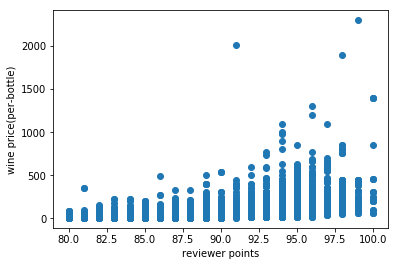

In [37]:
# Scatter plot of points(x-axis) compared to price(y-axis)
plt.scatter(scrubbed_wine['points'],scrubbed_wine['price'],marker='o')
plt.xlabel('reviewer points')
plt.ylabel('wine price(per-bottle)')

In [42]:
# Pearson correlation of price and points
pearsonr(scrubbed_wine['points'], scrubbed_wine['price'])

(nan, 1.0)

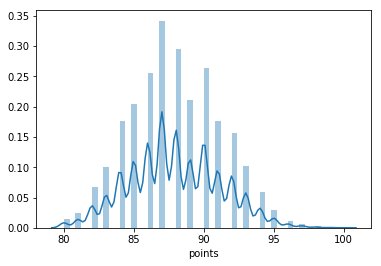

In [43]:
# Analytic distribution, The normal distribution of price.
sns.distplot(scrubbed_wine['points'])

In [48]:
# Linear regression model of price and points

from sklearn.linear_model import LinearRegression
x = scrubbed_wine['points']
y = scrubbed_wine['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)

NameError: name 'train_test_split' is not defined